## Urban: WLTC, CADC urban, NEDC, vs. USEPA (UDDS)
## HWY: CADC motorway 130 vs. USEPA (HWFET) , US06 (aggresive driving)



In [1]:
from google.colab import drive
# path
drive.mount('/content/gdrive')
gdrive_path = '/content/gdrive/My Drive/02.22_FRQ_Mobilité_durable_IVEO/Project/Lit_review_resources/tools/carculator/'

Mounted at /content/gdrive


In [3]:
#!pip install carculator
!pip list -v | grep carcu

carculator                       1.8.4                 /usr/local/lib/python3.10/dist-packages pip
carculator-utils                 1.1.0                 /usr/local/lib/python3.10/dist-packages pip


In [4]:
import pandas as pd
import numpy as np
import carculator
from carculator import *
from carculator import get_standard_driving_cycle_and_gradient
import matplotlib.pyplot as plt

## 0. Plotting driving cycle
- default ones in carculator
 - https://github.com/romainsacchi/carculator_utils/blob/master/carculator_utils/data/driving%20cycle/dc_specs.yaml

 - For car, the size of car (e.g., small, SUV) has same driving cycle e.g., WLTC same for different size car (same col_number to extract)


- USEPA ones:
  - urban: UDDS
  - HWY: HWFET, US06

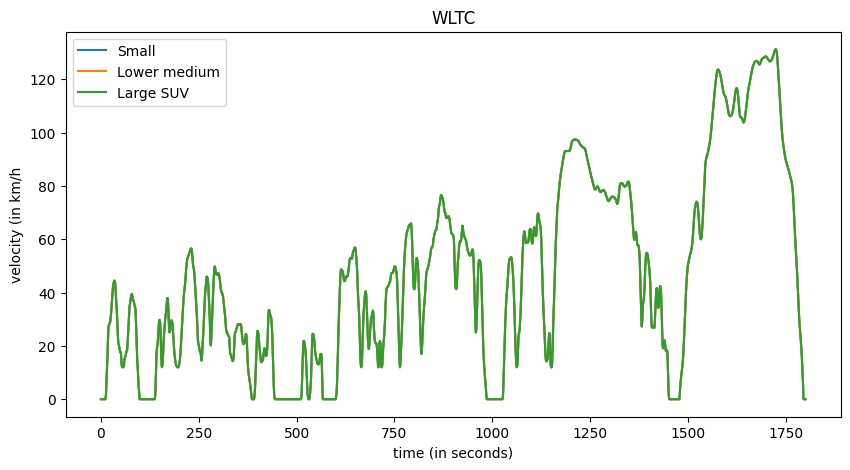

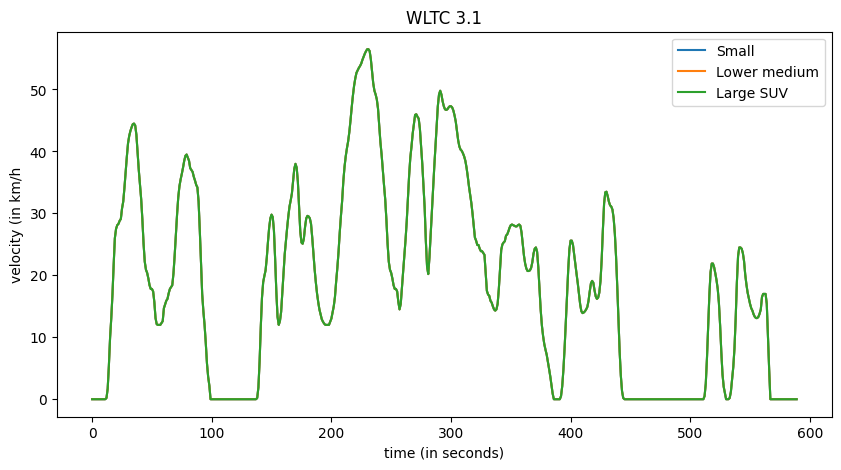

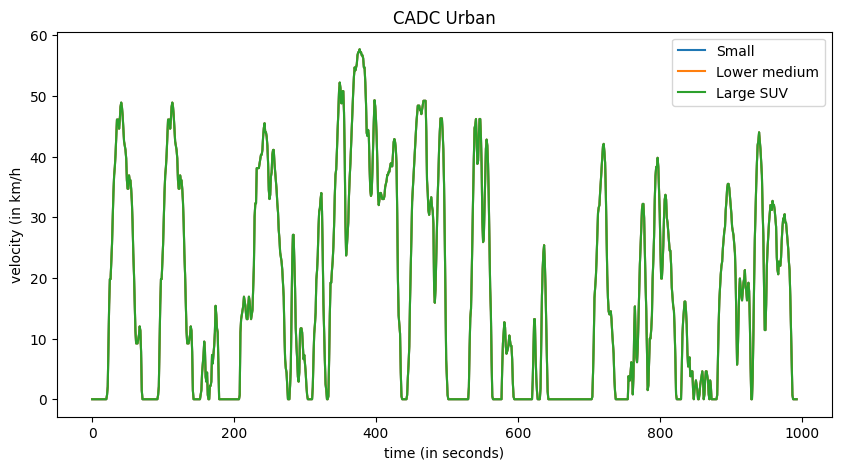

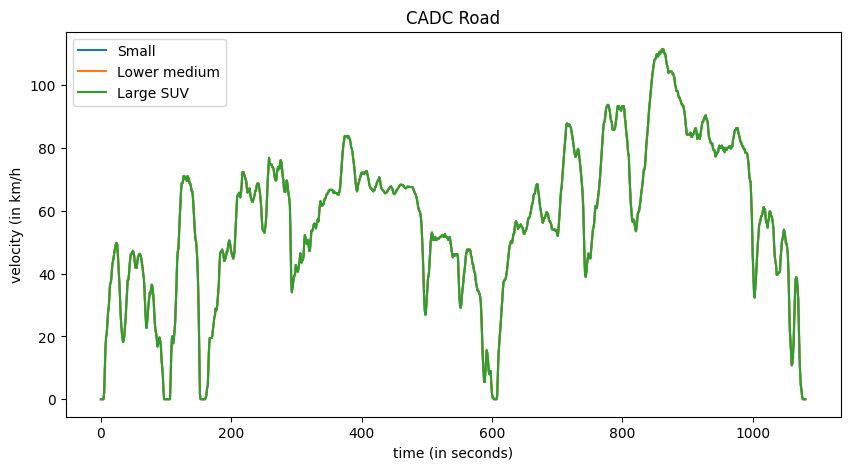

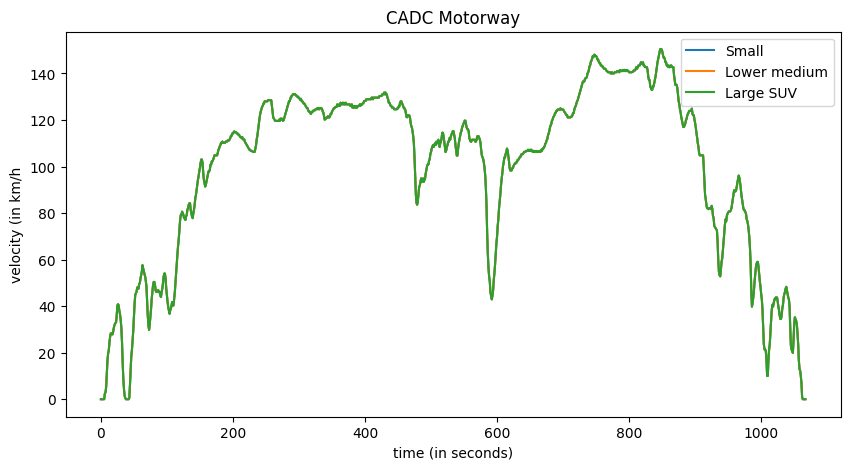

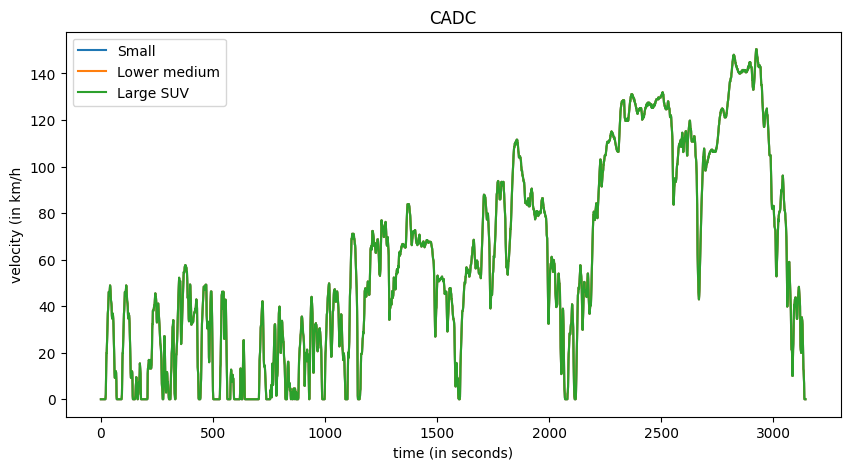

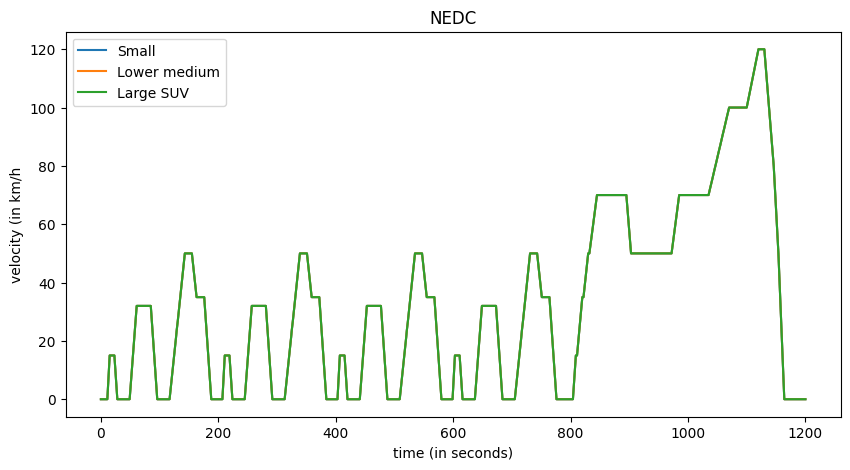

In [ ]:
#from carculator_utils import driving_cycles
from carculator import get_standard_driving_cycle_and_gradient
# the speed profile first returned value of the tuple [0]
car_cycles = list(['WLTC', 'WLTC 3.1',  'CADC Urban', 'CADC Road', 'CADC Motorway', 'CADC', 'NEDC'])
# WLTC (Worldwide Light-duty Test Cycle), NEDC (New European Driving Cycle), CADC (Common Artemis Driving Cycle)

for s in car_cycles:
  try:
    plt.figure(figsize=(10, 5))
    for v in ["Small", "Lower medium", "Large SUV"]:
      plt.plot(get_standard_driving_cycle_and_gradient(name=s, vehicle_type="car", vehicle_sizes=v)[0], label=v )
      plt.legend()
  except:
    print("driving cycle not found for:", s)

  plt.title(s)
  plt.ylabel("velocity (in km/h")
  plt.xlabel("time (in seconds)")
  plt.show()

### 1. Read US EPA DC
Read in the saved dataframe for USEPA driving cycle downloaded from: https://www.epa.gov/vehicle-and-fuel-emissions-testing/dynamometer-drive-schedules


In [5]:
fname = f'{gdrive_path}/trial_code/benchmark/figs_in_disc/DC/USEPA/udds.txt'
udds = pd.read_csv(fname,header=1, sep = "\t")
#udds
#changing udds mph to kmperh
udds["kmh"] = udds["Test Time, secs Target Speed, mph"] * 1.60934
#udds

In [6]:
fname = f'{gdrive_path}/trial_code/benchmark/figs_in_disc/DC/USEPA/HWFET.txt'
hwfet = pd.read_csv(fname,header=1, sep = "\t")
#hwfet
#changing mph to kmperh
hwfet["kmh"] = hwfet["Test Time, secs Target Speed, mph"] * 1.60934
#hwfet

In [7]:
fname = f'{gdrive_path}/trial_code/benchmark/figs_in_disc/DC/USEPA/us06.txt'
us06 = pd.read_csv(fname,header=1, sep = "\t")
#changing mph to kmperh
us06["kmh"] = us06["Unnamed: 1"] * 1.60934
#us06

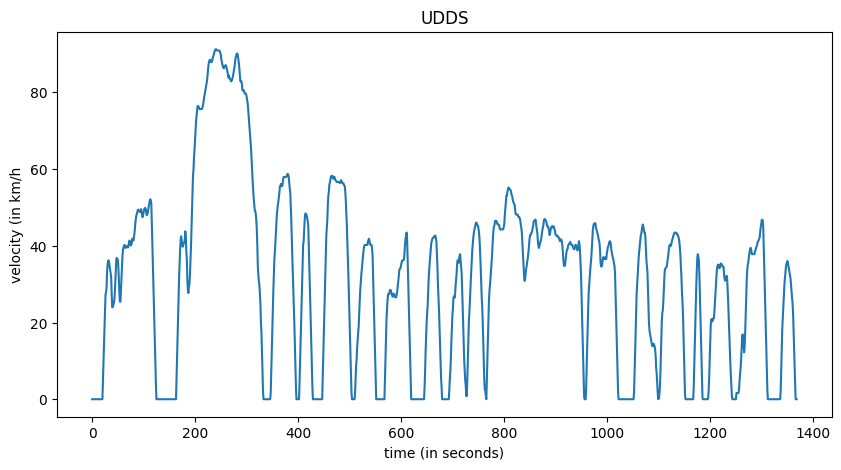

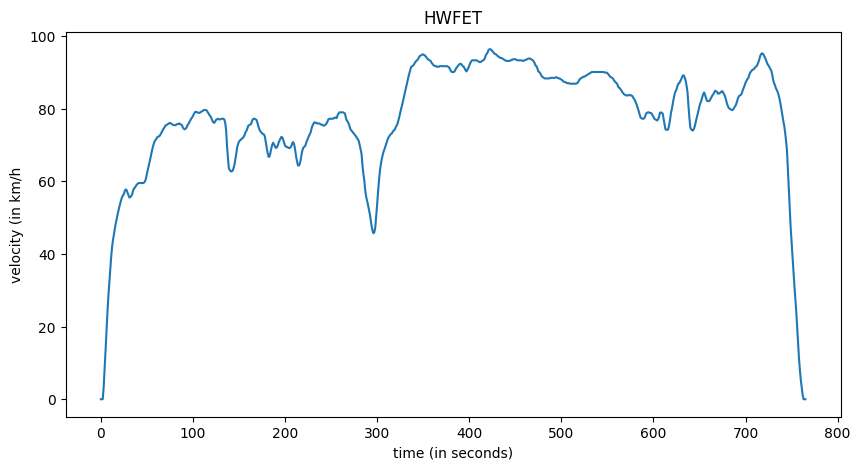

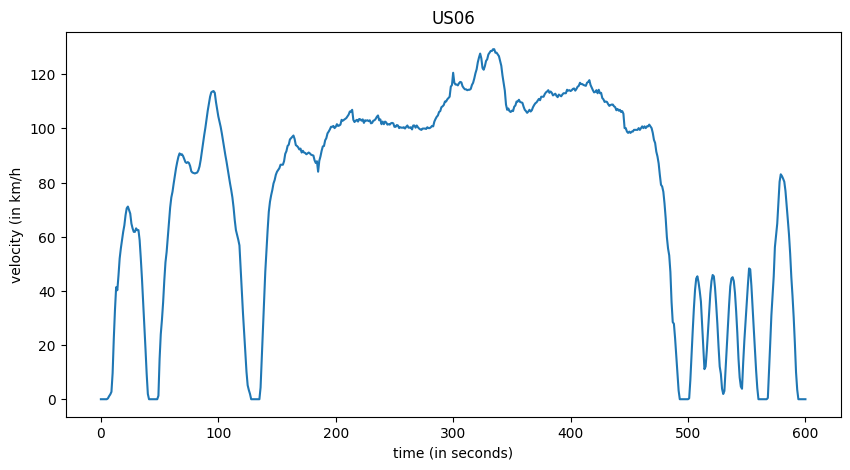

In [ ]:
usepa = [udds, hwfet, us06]
name = ["UDDS", "HWFET", "US06"]
for epa, n in zip(usepa, name):
  plt.figure(figsize=(10, 5))
  plt.plot(epa.index.values, epa["kmh"] )
  plt.title(n)
  plt.ylabel("velocity (in km/h")
  plt.xlabel("time (in seconds)")
  plt.show()

## 2. building up car model, for  urban and HWY

In [8]:
udds_kmh = np.array(udds['kmh'])
hwfet_kmh = np.array(hwfet["kmh"])
us06_kmh = np.array(us06["kmh"])

In [9]:
scope = {
            'size':['Large','Large SUV','Lower medium','Medium','Medium SUV','Small'],
            "year": [2020]
        }

cip = CarInputParameters()
cip.static()
dcts, array = fill_xarray_from_input_parameters(cip,  scope = scope)

In [10]:
urban_cycle = ["WLTC", "CADC Urban", "NEDC", udds_kmh]
hwy_cycle = ["CADC Motorway 130", hwfet_kmh, us06_kmh]

In [11]:
urban_result = []
for dc in urban_cycle:
    cm = CarModel(array, country="US", cycle=dc)
    cm.set_all()
    ic = InventoryCar(cm, method = "recipe")
    results = ic.calculate_impacts()
    urban_result.append(results)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is US.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * between 2020 and 2036, % of renewable: 61.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2020 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2020 _________________________________________ 0.0%
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 3.0%
 * petrol is completed by bioethanol - wheat straw.
 	 * in 2020 _________________________________________ 8.0%
 * *********************************************************************
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is US.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * between 2020 and 2036, % of renewable: 61.0.
 * electrolysis is completed by smr - na

In [12]:
hwy_result = []
for dc in hwy_cycle:
    cm = CarModel(array, country="US", cycle=dc)  #can also customize gradient=z
    cm.set_all()
    ic = InventoryCar(cm, method = "recipe")
    results = ic.calculate_impacts()
    hwy_result.append(results)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is US.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * between 2020 and 2036, % of renewable: 61.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2020 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2020 _________________________________________ 0.0%
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 3.0%
 * petrol is completed by bioethanol - wheat straw.
 	 * in 2020 _________________________________________ 8.0%
 * *********************************************************************
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is US.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * between 2020 and 2036, % of renewable: 61.0.
 * electrolysis is completed by smr - na

## 3. Only extract on-road direct exhaust GHG emissions  

since driving cycle won't impact on upstream fuel pathway / vehicle manuf. & EoL / road maintenance

In [ ]:
urban_result[0].sel(impact_category='climate change', powertrain = ['HEV-d', 'HEV-p', 'ICEV-d', 'ICEV-g', 'ICEV-p', 'PHEV-d','PHEV-p'], impact = 'direct - exhaust').to_dataframe('climate change')
#urban_result

### 3.1 For urban:

In [14]:
# create a dataset, using first list, results of WLTC cycle:
data = urban_result[0].sel(impact_category='climate change', powertrain = ['HEV-d', 'HEV-p', 'ICEV-d', 'ICEV-g', 'ICEV-p', 'PHEV-d','PHEV-p'], impact = 'direct - exhaust').to_dataframe('climate change')
# if wanna to sum all impact(not just direct - exhaust): urban_result[0].sel(impact_category='climate change').sum(axis=3).to_dataframe('climate change')
datat = data.T
dc_list = ["WLTC"]  #first dataset is for WLTC
drv_c_test =  ["WLTC", "CADC_Urban", "NEDC", "UDDS"]
for dc in range(1, len(drv_c_test)):  #starting from 1, as first cycle added in datat
    #print(drv_c_test[dc])
    dd = urban_result[dc].sel(impact_category='climate change', powertrain = ['HEV-d', 'HEV-p', 'ICEV-d', 'ICEV-g', 'ICEV-p', 'PHEV-d','PHEV-p'], impact = 'direct - exhaust').to_dataframe('climate change')
    datat = datat.append(dd['climate change'])
    dc_list.append(drv_c_test[dc])


datat = datat.drop(index=['impact_category','impact'])
datat["d_c"] = dc_list
#datat.set_index("d_c", inplace=True)
datat


<ipython-input-14-f35641e18436>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat = datat.append(dd['climate change'])
<ipython-input-14-f35641e18436>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat = datat.append(dd['climate change'])
<ipython-input-14-f35641e18436>:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat = datat.append(dd['climate change'])


size               Large                                                    \
powertrain         HEV-d     HEV-p    ICEV-d    ICEV-g    ICEV-p    PHEV-d   
year                2020      2020      2020      2020      2020      2020   
value                  0         0         0         0         0         0   
climate change  0.170506  0.175192  0.178557  0.160984  0.180792  0.067583   
climate change  0.207621   0.22356  0.224631  0.208925  0.233744  0.093196   
climate change  0.138762  0.149924  0.145409  0.138358  0.155105  0.046878   
climate change  0.131918  0.147417  0.141771   0.14032  0.155184  0.049419   

size                     Large SUV                      ... Medium SUV  \
powertrain        PHEV-p     HEV-d     HEV-p    ICEV-d  ...     PHEV-d   
year                2020      2020      2020      2020  ...       2020   
value                  0         0         0         0  ...          0   
climate change  0.069633  0.199983  0.204954  0.208182  ...   0.063579   
climate change  0.099356  0.234852  0.249607  0.258252  ...   0.084742   
climate change  0.050235  0.164058  0.177263  0.171843  ...    0.04349   
climate change  0.054637  0.157469  0.173334  0.169077  ...   0.044363   

size                         Small                                          \
powertrain        PHEV-p     HEV-d     HEV-p    ICEV-d    ICEV-g    ICEV-p   
year                2020      2020      2020      2020      2020      2020   
value                  0         0         0         0         0         0   
climate change  0.065411  0.124109  0.123992  0.128802  0.111278  0.127107   
climate change  0.090748  0.148469  0.152408  0.161758  0.145465  0.162933   
climate change   0.04599    0.1114  0.113361  0.115304  0.098199   0.11635   
climate change   0.04804  0.107265  0.112459  0.113631  0.104224  0.117284   

size                                       d_c  
powertrain        PHEV-d    PHEV-p              
year                2020      2020              
value                  0         0              
climate change  0.068651  0.070058        WLTC  
climate change  0.087482  0.091587  CADC_Urban  
climate change  0.055749  0.057721        NEDC  
climate change  0.053482  0.056803        UDDS  

[4 rows x 43 columns]

In [16]:
#save data
import os
fname = "urban_dc" + ".xlsx"
fpath = os.path.join(gdrive_path, "trial_code/benchmark/figs_in_disc/DC/", "results/", fname)
datat.to_excel(fpath )

#### plotting urban DC

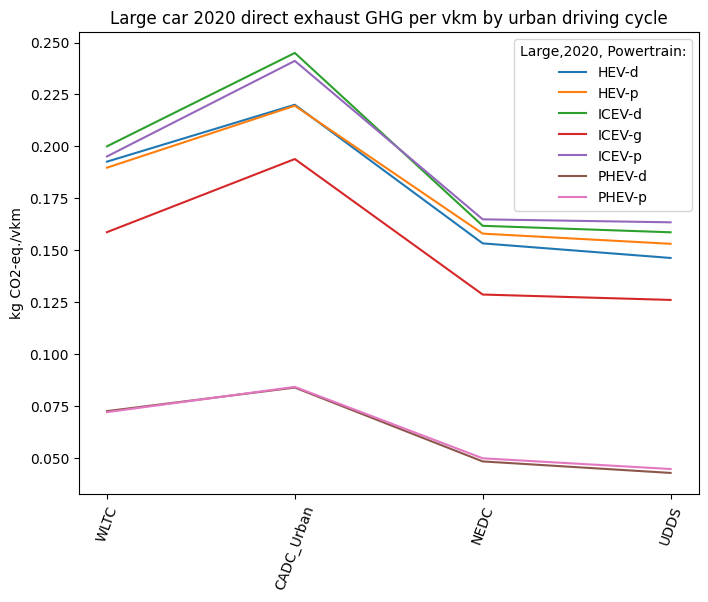

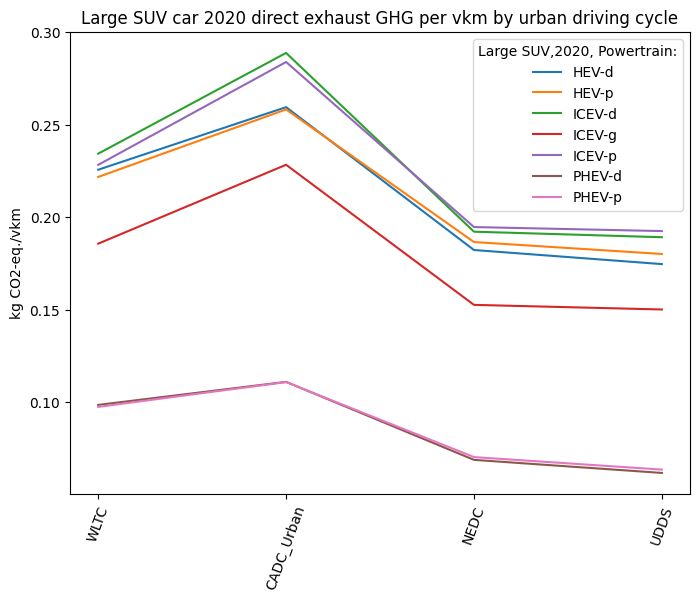

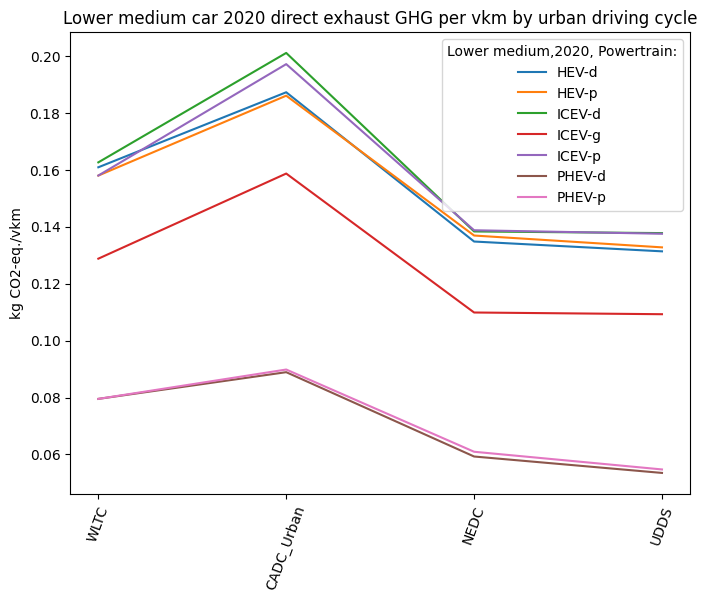

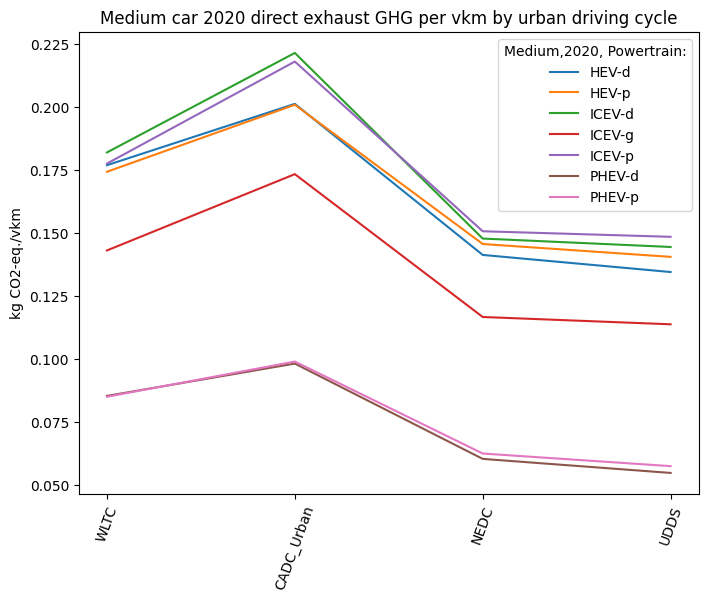

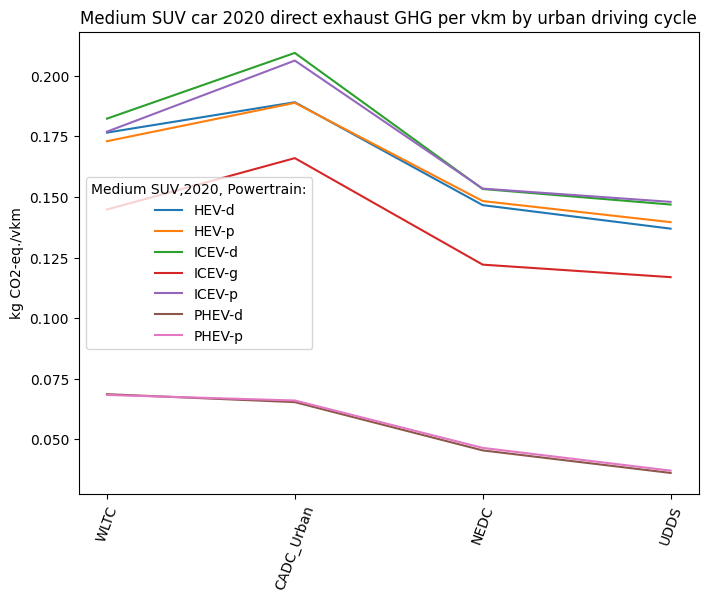

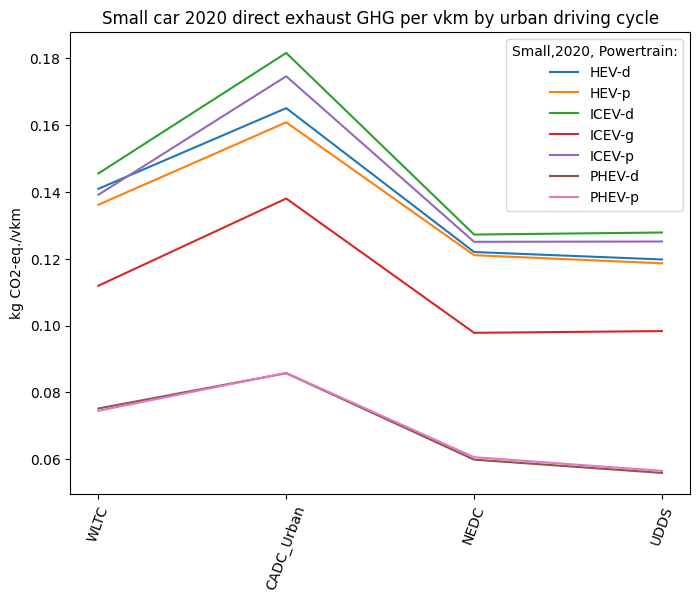

In [ ]:
for size in ['Large','Large SUV','Lower medium','Medium','Medium SUV','Small']:
  x = list(datat["d_c"])
  lab = ['HEV-d', 'HEV-p', 'ICEV-d', 'ICEV-g', 'ICEV-p', 'PHEV-d', 'PHEV-p']
  plt.rcParams["figure.figsize"] = (8,6)

  for i in range(len(lab)):
    y = datat.loc[:,size].iloc[:,i]
    plt.plot(x, y, label=lab[i] )   # drawstyle='steps', datat.iloc[:,i], label=lab[i]
  plt.legend(title= size+',2020, Powertrain:')
  plt.xticks(rotation=70)
  plt.ylabel('kg CO2eq per vkm')
  plt.title(size + " car 2020 direct exhaust GHG per vkm by urban driving cycle")
  plt.show()

### 3.2 For HWY

In [17]:
# create a dataset, using first list, results of CADC_130 cycle:
data = hwy_result[0].sel(impact_category='climate change', powertrain = ['HEV-d', 'HEV-p', 'ICEV-d', 'ICEV-g', 'ICEV-p', 'PHEV-d','PHEV-p'], impact = 'direct - exhaust').to_dataframe('climate change')
datat_hwy = data.T
dc_list = ["CADC_130"]  #first dataset is for WLTC
drv_c_test =  ["CADC_130", "HWFET", "US06"]
for dc in range(1, len(drv_c_test)):  #starting from 1, as first cycle added in datat
    #print(drv_c_test[dc])
    dd = hwy_result[dc].sel(impact_category='climate change', powertrain = ['HEV-d', 'HEV-p', 'ICEV-d', 'ICEV-g', 'ICEV-p', 'PHEV-d','PHEV-p'], impact = 'direct - exhaust').to_dataframe('climate change')
    datat_hwy = datat_hwy.append(dd['climate change'])
    dc_list.append(drv_c_test[dc])


datat_hwy = datat_hwy.drop(index=['impact_category','impact'])
datat_hwy["d_c"] = dc_list
datat_hwy

<ipython-input-17-e71489960030>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_hwy = datat_hwy.append(dd['climate change'])
<ipython-input-17-e71489960030>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_hwy = datat_hwy.append(dd['climate change'])


size               Large                                                    \
powertrain         HEV-d     HEV-p    ICEV-d    ICEV-g    ICEV-p    PHEV-d   
year                2020      2020      2020      2020      2020      2020   
value                  0         0         0         0         0         0   
climate change  0.228742  0.222715  0.232372  0.198227  0.224377  0.106457   
climate change  0.124151  0.133933  0.126147  0.128815  0.134929  0.037483   
climate change  0.211185  0.207854  0.220607  0.193464  0.215077   0.10138   

size                     Large SUV                      ... Medium SUV  \
powertrain        PHEV-p     HEV-d     HEV-p    ICEV-d  ...     PHEV-d   
year                2020      2020      2020      2020  ...       2020   
value                  0         0         0         0  ...          0   
climate change  0.104281  0.264152  0.257259  0.268631  ...   0.103177   
climate change  0.040226  0.152329  0.161252  0.154882  ...    0.04358   
climate change  0.100613  0.246379  0.240602  0.257508  ...   0.100445   

size                         Small                                          \
powertrain        PHEV-p     HEV-d     HEV-p    ICEV-d    ICEV-g    ICEV-p   
year                2020      2020      2020      2020      2020      2020   
value                  0         0         0         0         0         0   
climate change  0.101685  0.150354  0.144855  0.151883  0.118279  0.144555   
climate change  0.044233  0.119172  0.117674  0.120671  0.117567  0.118357   
climate change  0.098245  0.149359   0.14362  0.154812  0.122998  0.147464   

size                                     d_c  
powertrain        PHEV-d    PHEV-p            
year                2020      2020            
value                  0         0            
climate change  0.092717  0.091759  CADC_130  
climate change  0.056436  0.056411     HWFET  
climate change  0.092543  0.090797      US06  

[3 rows x 43 columns]

In [18]:
#save data
import os
fname = "hwy_dc" + ".xlsx"
fpath = os.path.join(gdrive_path, "trial_code/benchmark/figs_in_disc/DC/", "results/", fname)
datat_hwy.to_excel(fpath )

#### plotting HWY DC

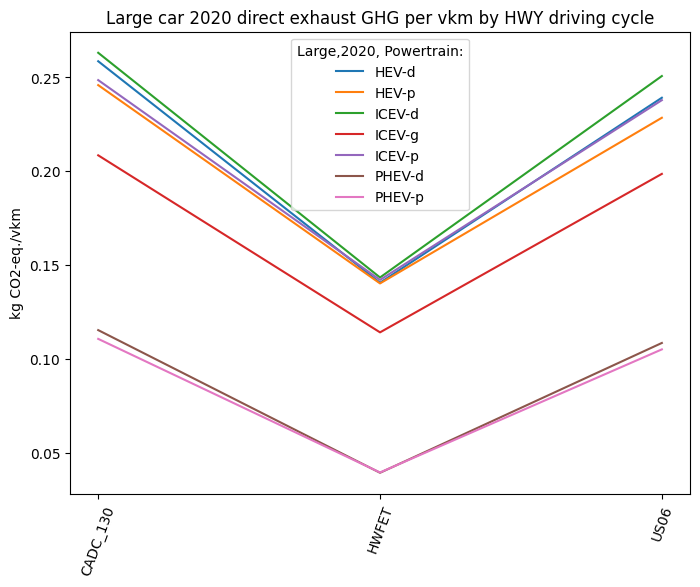

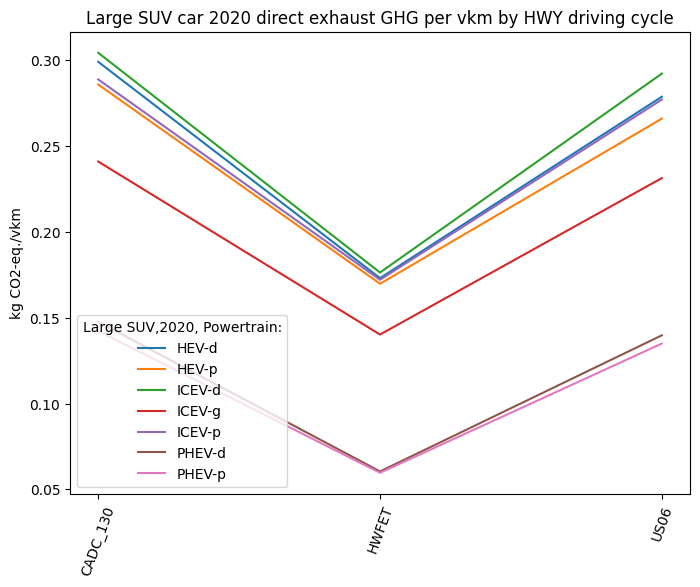

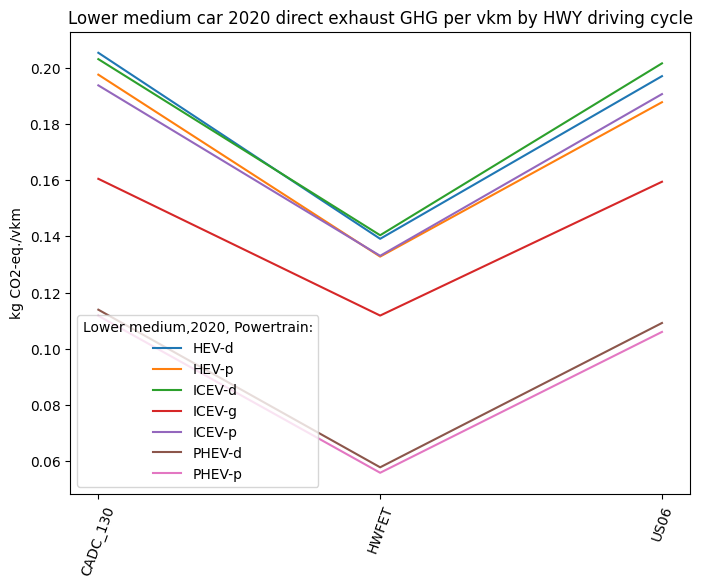

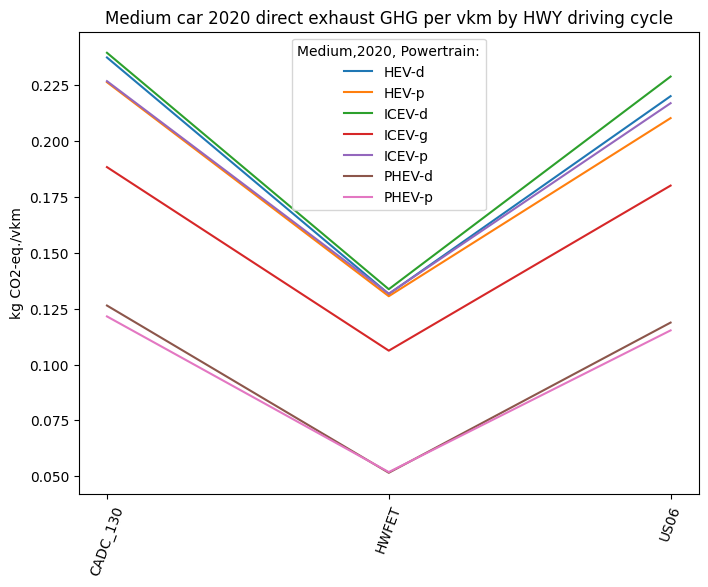

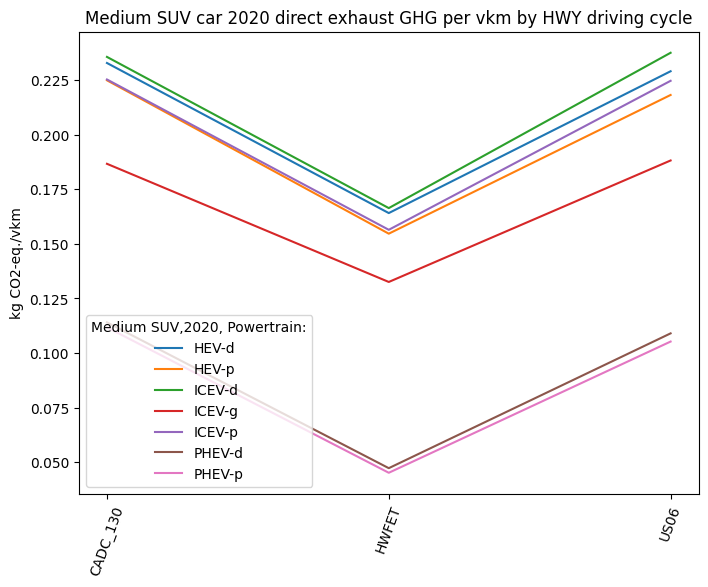

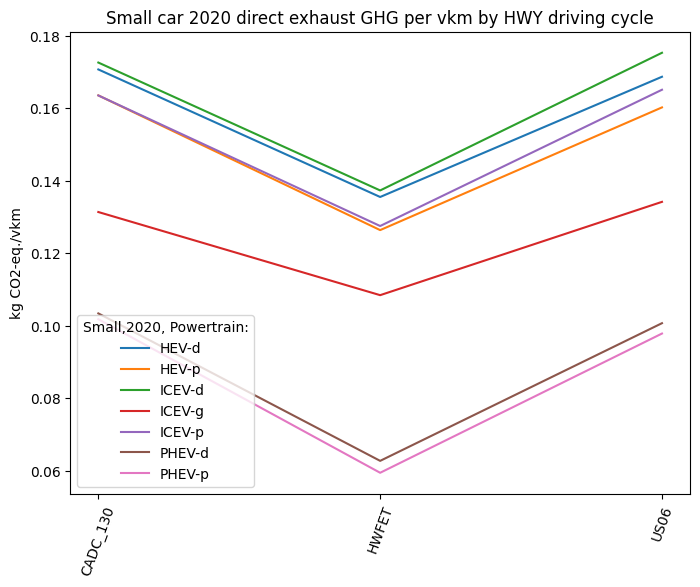

In [ ]:
for size in ['Large','Large SUV','Lower medium','Medium','Medium SUV','Small']:
  x = list(datat_hwy["d_c"])
  lab = ['HEV-d', 'HEV-p', 'ICEV-d', 'ICEV-g', 'ICEV-p', 'PHEV-d', 'PHEV-p']
  plt.rcParams["figure.figsize"] = (8,6)

  for i in range(len(lab)):
    y = datat_hwy.loc[:,size].iloc[:,i]
    plt.plot(x, y, label=lab[i])
  plt.legend(title= size+',2020, Powertrain:')
  plt.xticks(rotation=70)
  plt.ylabel('kg CO2-eq./vkm')
  plt.title(size + " car 2020 direct exhaust GHG per vkm by HWY driving cycle")
  plt.show()

### 4. if plot all urban and HWY DC together

In [ ]:
all_cycle = ["WLTC", "CADC Urban", "NEDC", udds_kmh, "CADC Motorway 130" , hwfet_kmh, us06_kmh]

In [ ]:
all_result = []
for dc in all_cycle:
    cm = CarModel(array, country="US", cycle=dc)
    cm.set_all()
    ic = InventoryCar(cm, method = "recipe")
    results = ic.calculate_impacts()
    all_result.append(results)

****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is US.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2020 and 2036, % of renewable: 61.0.
 * electrolysis is completed by smr - natural gas.
 	 * in 2020 _________________________________________ 0%
 * cng is completed by biogas - sewage sludge.
 	 * in 2020 _________________________________________ 0.0%
 * diesel is completed by biodiesel - cooking oil.
 	 * in 2020 _________________________________________ 3.0%
 * petrol is completed by bioethanol - wheat straw.
 	 * in 2020 _________________________________________ 8.0%
 * *********************************************************************
****************** IMPORTANT BACKGROUND PARAMETERS ******************
 * The country of use is US.
 * Power and energy batteries produced in CN using ['NMC-622'] chemistry/ies
 * Battery cell, NMC-622
between 2020 and 2036, % of renewable: 61

In [ ]:
# create a dataset, using first list, results of WLTC cycle:  if wanna all impacts, do not add "impact = 'direct - exhaust'", then add .sum(axis=3)
data = all_result[0].sel(impact_category='climate change', powertrain = [ 'ICEV-d', 'ICEV-p', 'PHEV-d','PHEV-p'], impact = 'direct - exhaust').to_dataframe('climate change')
datat_all = data.T
dc_list = ["WLTC"]  #first dataset is for WLTC
drv_c_test =  ["WLTC", "CADC_Urban", "NEDC", "UDDS", "CADC_130" ,  "HWFET", "US06"]
for dc in range(1, len(drv_c_test)):  #starting from 1, as first cycle added in datat
    #print(drv_c_test[dc])
    dd = all_result[dc].sel(impact_category='climate change', powertrain = [ 'ICEV-d', 'ICEV-p', 'PHEV-d','PHEV-p'], impact = 'direct - exhaust').to_dataframe('climate change')
    datat_all = datat_all.append(dd['climate change'])
    dc_list.append(drv_c_test[dc])

datat_all = datat_all.drop(index=['impact_category' , "impact"])
datat_all["d_c"] = dc_list
#datat.set_index("d_c", inplace=True)
datat_all

<ipython-input-179-d46ab5f6a196>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_all = datat_all.append(dd['climate change'])
<ipython-input-179-d46ab5f6a196>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_all = datat_all.append(dd['climate change'])
<ipython-input-179-d46ab5f6a196>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_all = datat_all.append(dd['climate change'])
<ipython-input-179-d46ab5f6a196>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_all = datat_all.append(dd['climate change'])
<ipython-input-179-d46ab5f6a196>:9: FutureWarning: The frame.append method is deprecated and will be removed fro

size               Large                               Large SUV            \
powertrain        ICEV-d    ICEV-p    PHEV-d    PHEV-p    ICEV-d    ICEV-p   
year                2020      2020      2020      2020      2020      2020   
value                  0         0         0         0         0         0   
climate change  0.200016  0.195147  0.068932  0.068431  0.234326  0.228278   
climate change  0.245004  0.241171  0.083812  0.084155  0.288765  0.283872   
climate change   0.16173  0.164852  0.048244  0.049748  0.192156  0.194658   
climate change  0.158611   0.16341  0.042703  0.044588  0.189171  0.192488   
climate change  0.263152  0.248594   0.11542  0.110751  0.304134  0.288638   
climate change  0.143457  0.142167  0.039425  0.039593  0.176244  0.172025   
climate change  0.250764  0.237914  0.108574  0.105151  0.292013  0.276901   

size                               Lower medium            ...    Medium  \
powertrain        PHEV-d    PHEV-p       ICEV-d    ICEV-p  ...    PHEV-p   
year                2020      2020         2020      2020  ...      2020   
value                  0         0            0         0  ...         0   
climate change  0.094867  0.093803      0.16255  0.157924  ...  0.082467   
climate change  0.110985  0.110869     0.200966  0.197035  ...  0.099092   
climate change  0.068841   0.07034     0.138294  0.138711  ...  0.062653   
climate change  0.061784  0.063588     0.137716  0.137494  ...  0.057652   
climate change  0.147579  0.142185     0.203168  0.193821  ...  0.121539   
climate change  0.060467  0.059692     0.140418  0.133092  ...  0.051834   
climate change  0.139701  0.134914     0.201664  0.190714  ...  0.115282   

size           Medium SUV                                   Small            \
powertrain         ICEV-d    ICEV-p    PHEV-d    PHEV-p    ICEV-d    ICEV-p   
year                 2020      2020      2020      2020      2020      2020   
value                   0         0         0         0         0         0   
climate change   0.182366  0.177001  0.066017  0.065703  0.145508  0.139146   
climate change   0.209483  0.206327  0.065388  0.066062  0.181603  0.174612   
climate change   0.153328  0.153493   0.04547  0.046505  0.127229  0.125052   
climate change   0.146922  0.148026  0.036173  0.037121   0.12784   0.12514   
climate change   0.235594  0.225261   0.11406  0.111785  0.172583  0.163511   
climate change   0.166376  0.156438  0.047302  0.045193  0.137307  0.127499   
climate change   0.237489  0.224653  0.109021  0.105271   0.17528  0.165082   

size                                       d_c  
powertrain        PHEV-d    PHEV-p              
year                2020      2020              
value                  0         0              
climate change  0.073928  0.073242        WLTC  
climate change  0.085725  0.085804  CADC_Urban  
climate change  0.059842   0.06058        NEDC  
climate change  0.055864  0.056474        UDDS  
climate change  0.103393  0.101797    CADC_130  
climate change  0.062723  0.059436       HWFET  
climate change  0.100694  0.097839        US06  

[7 rows x 25 columns]

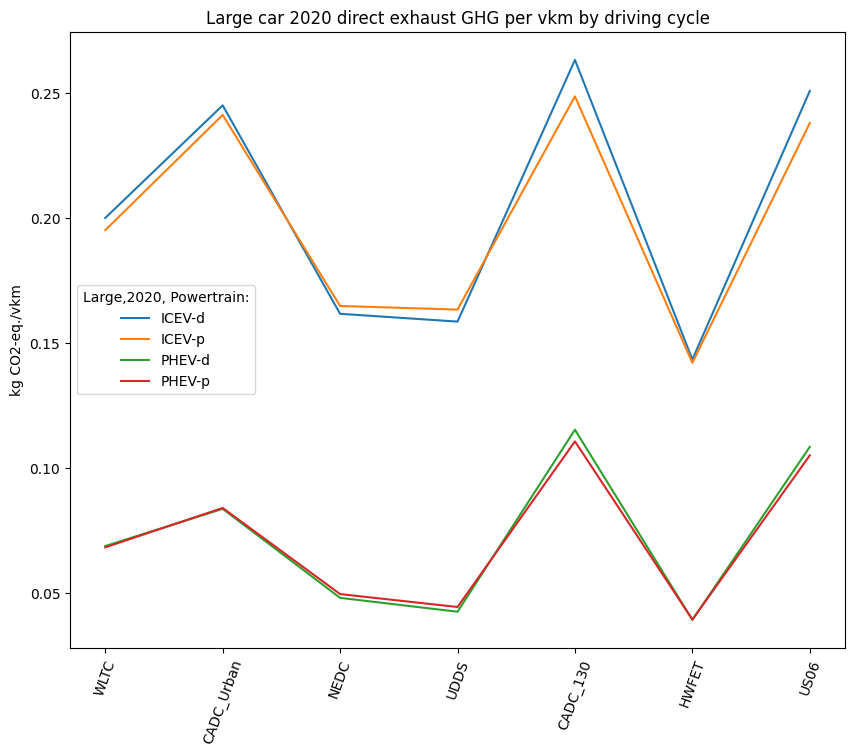

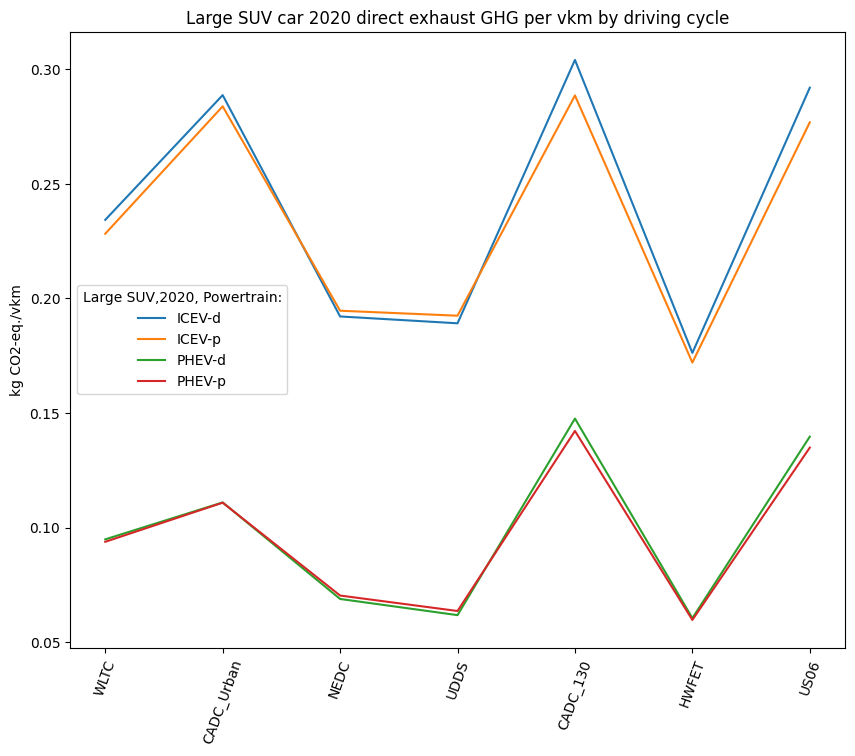

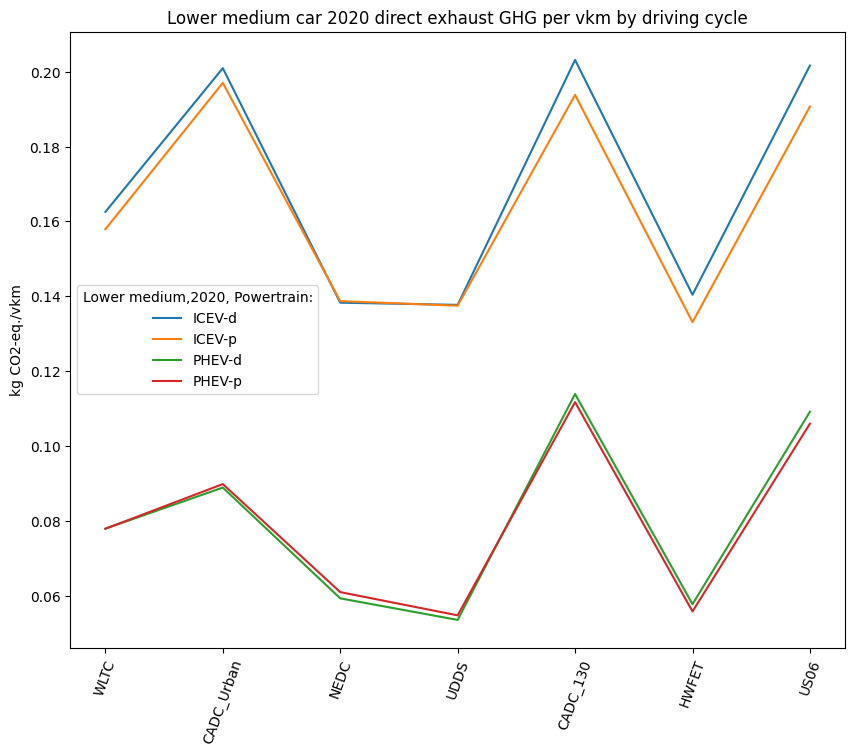

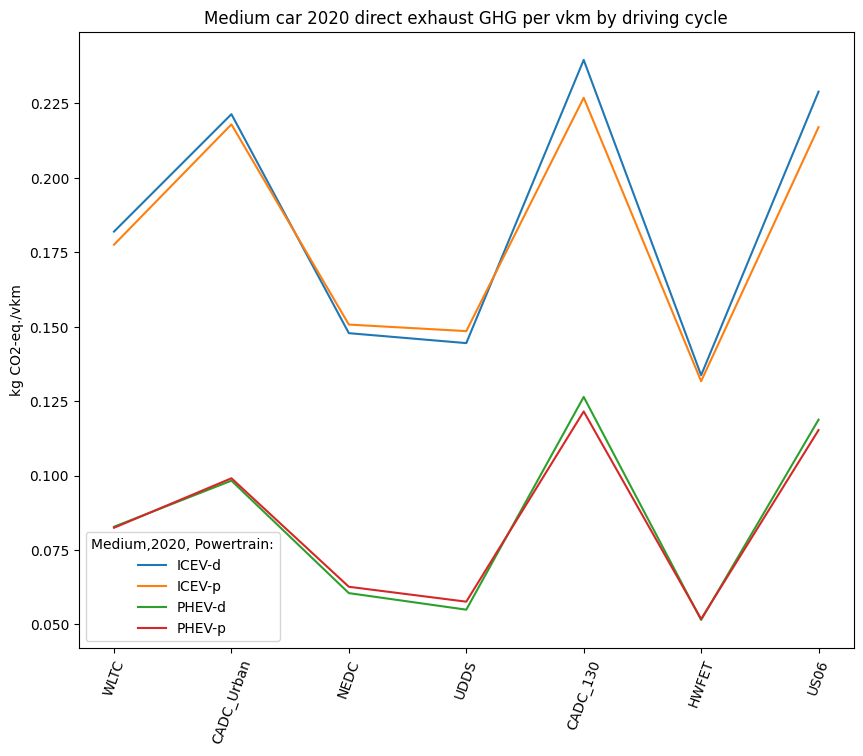

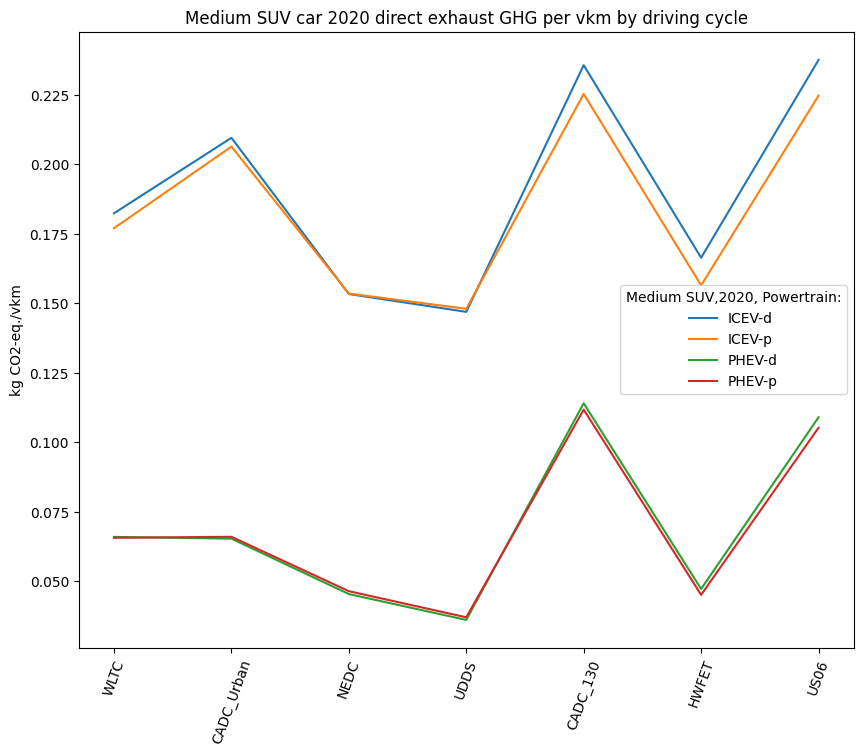

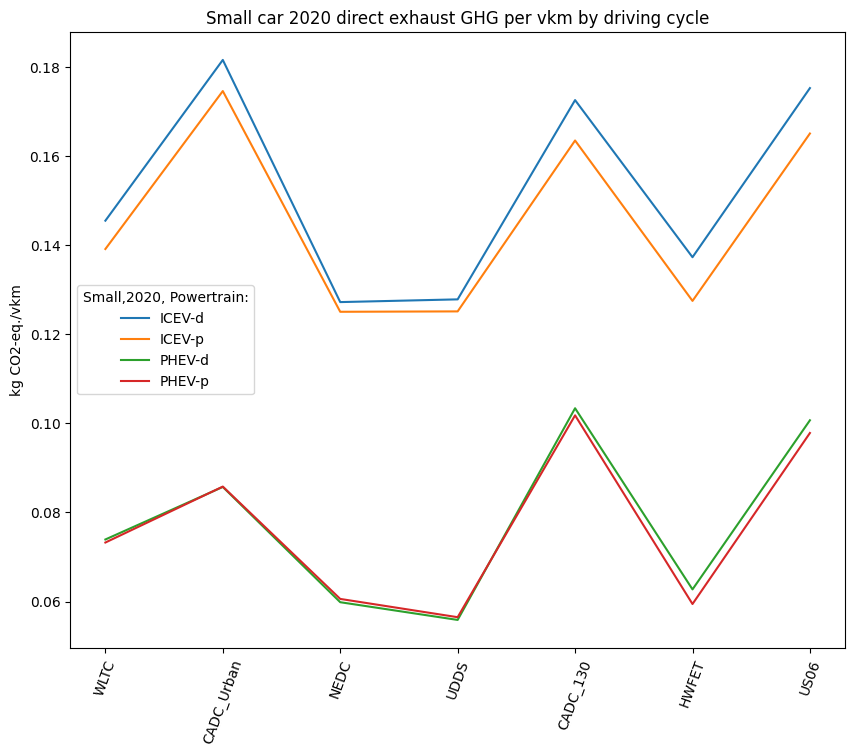

In [ ]:
for size in ['Large','Large SUV','Lower medium','Medium','Medium SUV','Small']:
  x = list(datat_all["d_c"])
  lab = ['ICEV-d', 'ICEV-p', 'PHEV-d', 'PHEV-p']
  plt.rcParams["figure.figsize"] = (10,8)

  for i in range(len(lab)):
    y = datat_all.loc[:,size].iloc[:,i]
    plt.plot(x, y, label=lab[i])
  plt.legend(title= size+',2020, Powertrain:')
  plt.xticks(rotation=70)
  plt.ylabel('kg CO2-eq./vkm')
  plt.title(size + " car 2020 direct exhaust GHG per vkm by driving cycle")
  plt.show()

### 4.1 TTW energy consumption  

In [ ]:
all_result = []
for dc in all_cycle:
    cm = CarModel(array, country="US", cycle=dc)
    cm.set_all()
    all_result.append(cm)

In [ ]:
# create a dataset, using first list, results of WLTC cycle:
data = all_result[0].array.sel(parameter=['TtW energy']).to_dataframe('TtW energy')
datat_all = data.T
dc_list = ["WLTC"]  #first dataset is for WLTC
drv_c_test =  ["WLTC", "CADC_Urban", "NEDC", "UDDS", "CADC_130" ,  "HWFET", "US06"]
for dc in range(1, len(drv_c_test)):  #starting from 1, as first cycle added in datat
    #print(drv_c_test[dc])
    dd = all_result[dc].array.sel(parameter=['TtW energy']).to_dataframe('TtW energy')
    datat_all = datat_all.append(dd['TtW energy'])
    dc_list.append(drv_c_test[dc])

<ipython-input-187-ea4f0e707c67>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_all = datat_all.append(dd['TtW energy'])
<ipython-input-187-ea4f0e707c67>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_all = datat_all.append(dd['TtW energy'])
<ipython-input-187-ea4f0e707c67>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_all = datat_all.append(dd['TtW energy'])
<ipython-input-187-ea4f0e707c67>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  datat_all = datat_all.append(dd['TtW energy'])
<ipython-input-187-ea4f0e707c67>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

In [ ]:
datat_all["d_c"] = dc_list
#datat.set_index("d_c", inplace=True)
datat_all

size             Large                                                      \
powertrain         BEV         FCEV        HEV-d        HEV-p       ICEV-d   
parameter   TtW energy   TtW energy   TtW energy   TtW energy   TtW energy   
year              2020         2020         2020         2020         2020   
value                0            0            0            0            0   
TtW energy  622.755737  1363.362671  2682.754150  2677.156494  2806.627930   
TtW energy  616.060669  1439.008545  3087.471924  3122.737305  3437.597900   
TtW energy  556.418030  1141.549072  2150.590820  2242.259766  2269.302002   
TtW energy  520.453552  1106.378296  2051.864990  2172.510742  2225.389404   
TtW energy  807.493958  1817.045898  3629.513916  3501.247803  3692.849609   
TtW energy  538.271240  1068.151733  1973.656982  1993.792236  2012.966553   
TtW energy  782.433594  1805.575439  3356.618164  3254.726562  3518.928711   

size                                                             Large SUV  \
powertrain       ICEV-g       ICEV-p       PHEV-d       PHEV-p         BEV   
parameter    TtW energy   TtW energy   TtW energy   TtW energy  TtW energy   
year               2020         2020         2020         2020        2020   
value                 0            0            0            0           0   
TtW energy  2792.220215  2774.730469  1544.116455  1559.930786  723.912781   
TtW energy  3415.167236  3431.637451  1839.234375  1884.087402  690.922119   
TtW energy  2258.702637  2340.778809  1183.980713  1229.978638  637.971497   
TtW energy  2213.260010  2320.442383  1096.125244  1149.579102  590.334351   
TtW energy  3676.192627  3539.435303  2321.281250  2274.055176  960.478943   
TtW energy  2008.990479  2020.665894  1028.687256  1045.209717  626.975159   
TtW energy  3503.791016  3388.859375  2200.740234  2176.468750  924.195740   

size        ...       Small                                         \
powertrain  ...         BEV         FCEV        HEV-d        HEV-p   
parameter   ...  TtW energy   TtW energy   TtW energy   TtW energy   
year        ...        2020         2020         2020         2020   
value       ...           0            0            0            0   
TtW energy  ...  499.372375  1049.351807  1963.871948  1917.893555   
TtW energy  ...  453.471161   977.365295  2315.919678  2282.678711   
TtW energy  ...  432.041077   856.772949  1711.752319  1714.332520   
TtW energy  ...  392.793243   784.269653  1680.370483  1680.081299   
TtW energy  ...  685.226929  1486.927124  2395.068115  2322.834229   
TtW energy  ...  431.866333   844.314697  1901.352417  1794.756592   
TtW energy  ...  648.707886  1345.302734  2366.715088  2277.666260   

size                                                                         \
powertrain       ICEV-d       ICEV-g       ICEV-p       PHEV-d       PHEV-p   
parameter    TtW energy   TtW energy   TtW energy   TtW energy   TtW energy   
year               2020         2020         2020         2020         2020   
value                 0            0            0            0            0   
TtW energy  2041.654175  1963.327393  1973.904907  1384.661377  1391.683350   
TtW energy  2547.921387  2424.624023  2479.871826  1614.552368  1644.384399   
TtW energy  1785.105469  1712.571533  1771.631226  1154.182373  1181.681519   
TtW energy  1793.590576  1722.159424  1773.178223  1097.442261  1123.055420   
TtW energy  2421.734863  2308.417969  2322.675049  1841.394165  1841.406616   
TtW energy  1926.663086  1906.243530  1810.893188  1205.657471  1164.264648   
TtW energy  2459.564453  2361.038818  2347.313232  1810.168457  1789.592773   

size               d_c  
powertrain              
parameter               
year                    
value                   
TtW energy        WLTC  
TtW energy  CADC_Urban  
TtW energy        NEDC  
TtW energy        UDDS  
TtW energy    CADC_130  
TtW energy       HWFET  
TtW energy        US06  

[7 rows x 55 columns]

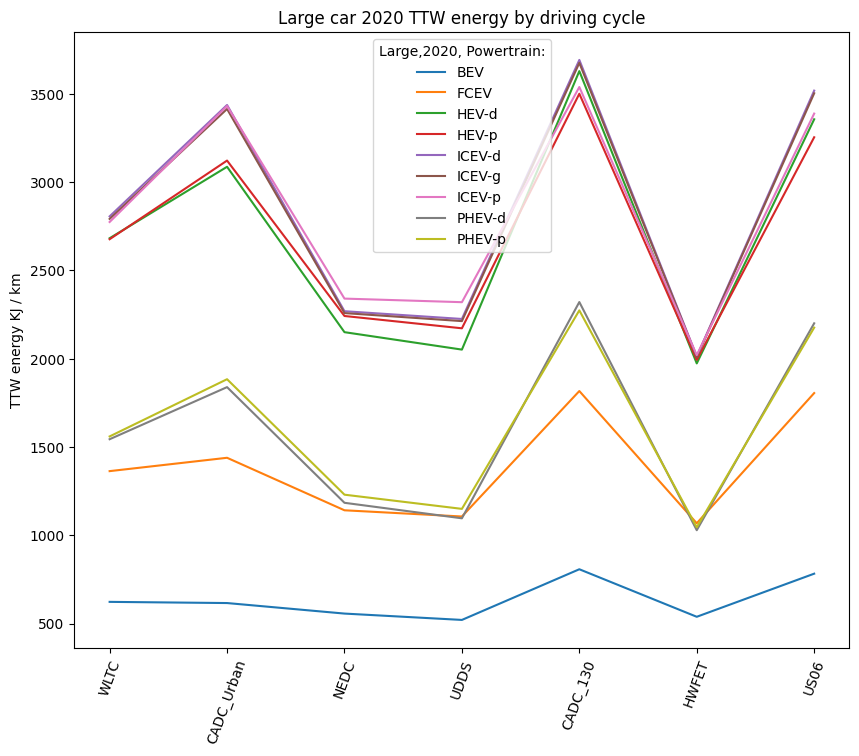

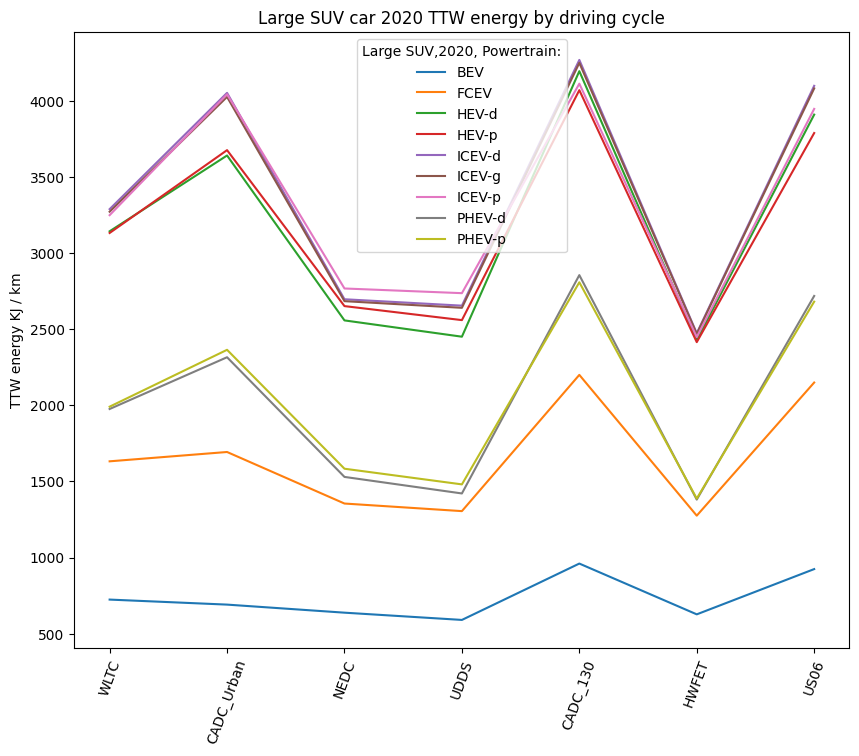

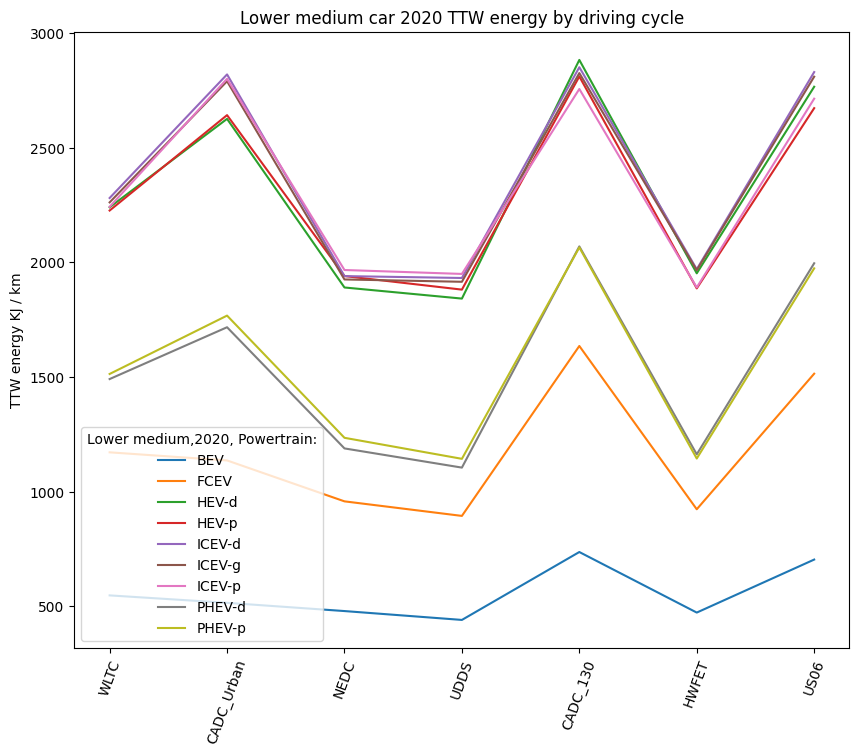

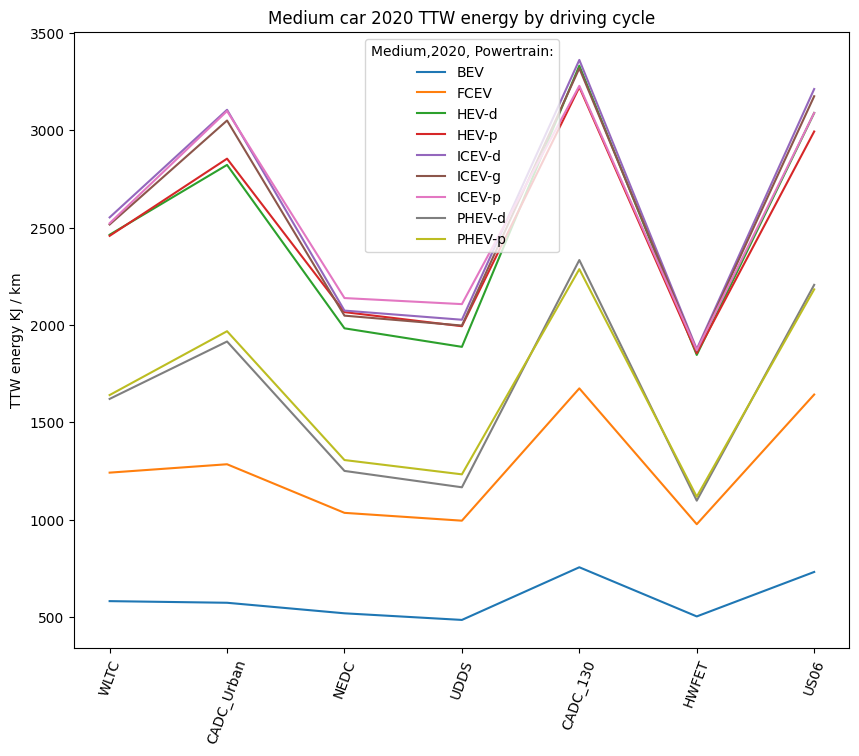

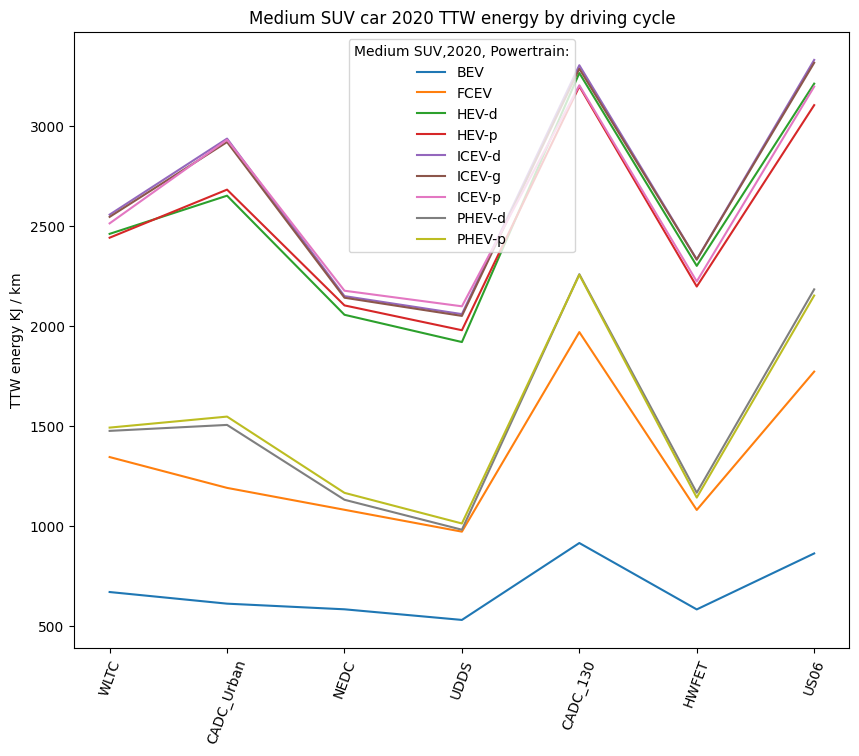

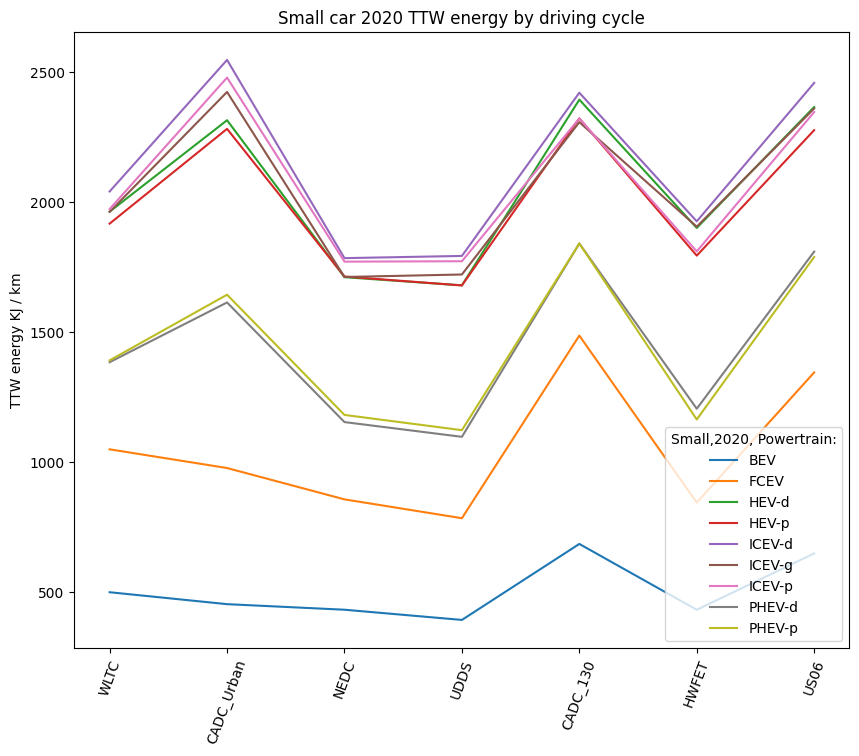

In [ ]:
for size in ['Large','Large SUV','Lower medium','Medium','Medium SUV','Small']:
  x = list(datat_all["d_c"])
  lab = ['BEV',	'FCEV', 'HEV-d', 'HEV-p', 'ICEV-d', 'ICEV-g', 'ICEV-p', 'PHEV-d', 'PHEV-p']
  plt.rcParams["figure.figsize"] = (10,8)

  for i in range(len(lab)):
    y = datat_all.loc[:,size].iloc[:,i]
    plt.plot(x, y, label=lab[i])
  plt.legend(title= size+',2020, Powertrain:')
  plt.xticks(rotation=70)
  plt.ylabel('TTW energy KJ / km')
  plt.title(size + " car 2020 TTW energy by driving cycle")
  plt.show()